<a href="https://colab.research.google.com/github/brunomelao/CEL039/blob/main/Atividade_3_Bruno_Mel%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


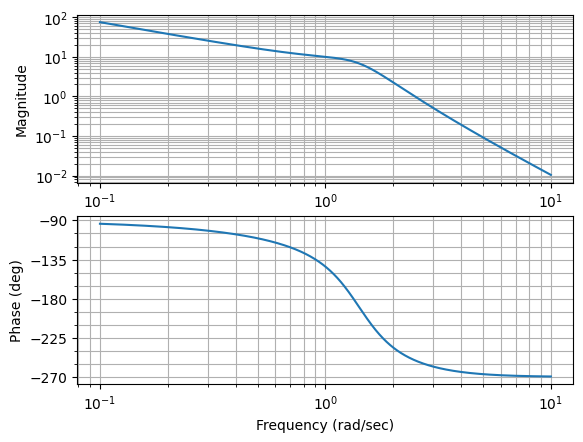

In [ ]:
from plotly.tools import make_subplots
import numpy as np
import control as co
w = np.logspace(-1,1,300)

# Calculo do Ganho Constante K
K_dB = 20.*np.log10(7.5)*np.ones(300,dtype='float')
K_deg = np.zeros(300,dtype='float')

# Calculo do Integrador
Int_dB = -20.*np.log10(w)
Int_deg = -90.*np.ones(300,dtype='float')

# Calculo do Polo de Primeira Ordem
T = 1/2
PPO_dB = -20*np.log10(T*w)
PPO_deg = -(180./np.pi)*np.arctan(T*w)
indices = np.where(w<2)
PPO_dB[indices] = 0.

#Calculo do Zero de Primeira Ordem 
T_zero = 1/3
ZPO_dB= 20*np.log10(T_zero*w)
ZPO_deg= (180./np.pi)*np.arctan(T_zero*w)
indices_zero=np.where (w<3)
ZPO_dB[indices_zero]=0.


#Calculo do Sistema de segunda ordem no denominador
SSO_dB= -40*np.log10(w/np.sqrt(2))
indice_SO=np.where(w<np.sqrt(2))
SSO_dB[indice_SO]=0
SSO_deg= -(180./np.pi)*np.arctan((w/2)/(1-((w/np.sqrt(2))**2)))
indices_SSO=np.where(w>np.sqrt(2))

SSO_deg[indices_SSO]=-180 -(180./np.pi)*np.arctan((w[indices_SSO]/2)/(1-((w[indices_SSO]/np.sqrt(2))**2)))


#Sistema Real
num=[10, 30]
den=[1,3,4,4,0]
gs=co.tf(num, den)
gjw_real=co.bode(gs)
mag=gjw_real[0]
magdB=20*np.log10(mag)
fase=gjw_real[1]
fase_rad=(180./np.pi)*fase
w_novo=gjw_real[2]



In [ ]:
import plotly.graph_objs as go

Bode_db = go.Figure()
Bode_db.add_trace(go.Scatter(x=w, y=K_dB, mode='lines', name='Termo Cte'))
Bode_db.add_trace(go.Scatter(x=w, y=Int_dB, mode='lines', name='Integrador'))
Bode_db.add_trace(go.Scatter(x=w, y=PPO_dB, mode='lines', name='Polo Prim. Ord'))
Bode_db.add_trace(go.Scatter(x=w, y=ZPO_dB, mode='lines', name='Zero Prim. Ord'))
Bode_db.add_trace(go.Scatter(x=w, y=SSO_dB, mode='lines', name='Sistema Segunda Ordem'))
Bode_db.add_trace(go.Scatter(x=w, y=K_dB+Int_dB+PPO_dB+ZPO_dB+SSO_dB, mode='lines', name='Final'))
Bode_db.add_trace(go.Scatter(y=magdB,x=w_novo,mode='lines',line=dict(dash='dash'),name="Curva de módulo real"))

Bode_db.update_xaxes(type='log')

Bode_deg = go.Figure()
Bode_deg.add_trace(go.Scatter(x=w, y=K_deg, mode='lines', name='Termo Cte'))
Bode_deg.add_trace(go.Scatter(x=w, y=Int_deg, mode='lines', name='Integrador'))
Bode_deg.add_trace(go.Scatter(x=w, y=PPO_deg, mode='lines', name='Polo Prim. Ord'))
Bode_deg.add_trace(go.Scatter(x=w, y=ZPO_deg, mode='lines', name='Zero Prim. Ord'))
Bode_deg.add_trace(go.Scatter(x=w, y=SSO_deg, mode='lines', name='Sistema de segunda ordem'))
Bode_deg.add_trace(go.Scatter(x=w, y=K_deg+Int_deg+PPO_deg+ZPO_deg+SSO_deg, mode='lines', name='Final'))
Bode_deg.add_trace(go.Scatter(y=fase_rad,x=w_novo,mode='lines',line=dict(dash='dash'),name="Curva de fase real"))
Bode_deg.update_xaxes(type='log')

Bode_db.show()
Bode_deg.show()